In [1]:
import numpy as np

In [9]:
n_neurons = 10
n_time = 120

X = np.random.choice((0, 1), size=(n_time, n_neurons))

In [16]:
def get_pK(X):
    n_time, n_neurons = X.shape
    population_rate = np.sum(X, axis=1) 
    p_K = np.asarray([(population_rate == i).sum() for i in range(n_neurons + 1)])  / n_time
    return p_K

def get_pK(X, alpha=0.01):
    n_time, n_neurons = X.shape
    population_rate = np.sum(X, axis=1) 
    c = np.asarray([(population_rate == i).sum() for i in range(n_neurons + 1)])
    return (c + alpha) / (n_time + (n_neurons * alpha))



In [19]:
get_pK(X, alpha=0.01)

array([8.40965862e-03, 8.32639467e-05, 2.50624480e-02, 1.49958368e-01,
       2.33222315e-01, 2.41548709e-01, 1.58284763e-01, 1.49958368e-01,
       3.33888426e-02, 8.32639467e-05, 8.32639467e-05])

In [21]:
n_time, n_neurons = X.shape
population_rate = np.sum(X, axis=1) 

In [30]:
c = np.histogram2d(
    population_rate, 
    X[:, 0], 
    bins=[np.arange(n_neurons + 1), (0, 1)], range=)
c

(array([[ 1.],
        [ 0.],
        [ 3.],
        [18.],
        [28.],
        [29.],
        [19.],
        [18.],
        [ 4.],
        [ 0.]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0, 1]))

In [41]:
n_active_by_neuron = np.sum(X[population_rate == 4, :], axis=0)



array([ 9, 10, 10, 10, 15, 14, 12, 15,  8,  9])

In [42]:
neuron = X[:, 0]
n_bins = n_neurons + 1
out = np.empty(n_bins)
for k in range(n_bins):
    dik = neuron[population_rate == k]
    out[k] = dik.sum()

out

array([ 0.,  0.,  1.,  3.,  9., 18., 12., 13.,  2.,  0.,  0.])

In [71]:
prior_var_scale = 0.5  # scalre variance of beta prior


neuron = X[:, 0]
n_bins = n_neurons + 1
out = np.empty((n_bins, n_neurons))
for k in range(n_bins):
    X_k = X[population_rate == k, :]
    n_active_by_neuron = np.sum(X_k, axis=0,)
    T_k = X_k.shape[0]
    
    mu = k + 1 / n_bins
    sigma2 = prior_var_scale**2 * mu * (1-mu)

    beta1 = mu*((mu - mu**2 - sigma2)/sigma2)
    beta2 = beta1*( 1/mu - 1)
    # print(X_k.shape, n_active_by_neuron.shape, n_active_by_neuron)
    out[k, :] = (n_active_by_neuron + beta1) / (T_k + beta1 + beta2);


In [72]:
out.sum(axis=0)

array([30.62475007, 30.93460553, 31.2306012 , 31.00197566, 30.54300083,
       29.9494603 , 30.56689764, 31.10184824, 31.05380153, 30.58375981])

In [70]:
out[:]

array([[ 0.06818182,  0.06818182,  0.06818182,  0.06818182,  0.06818182,
         0.06818182,  0.06818182,  0.06818182,  0.06818182,  0.06818182],
       [ 1.09090909,  1.09090909,  1.09090909,  1.09090909,  1.09090909,
         1.09090909,  1.09090909,  1.09090909,  1.09090909,  1.09090909],
       [ 1.21212121,  1.04545455,  1.21212121,  1.21212121,  1.04545455,
         1.04545455,  1.04545455,  1.21212121,  1.21212121,  1.21212121],
       [ 0.58441558,  0.82251082,  0.82251082,  0.82251082,  0.63203463,
         0.53679654,  0.58441558,  0.77489177,  0.77489177,  0.63203463],
       [ 0.68621701,  0.71847507,  0.71847507,  0.71847507,  0.8797654 ,
         0.84750733,  0.7829912 ,  0.8797654 ,  0.65395894,  0.68621701],
       [ 1.03977273,  0.91477273,  1.03977273,  0.85227273,  0.88352273,
         0.78977273,  1.00852273,  1.03977273,  0.97727273,  0.75852273],
       [ 1.37603306,  1.4214876 ,  1.33057851,  1.19421488,  1.37603306,
         1.19421488,  1.46694215,  1.4214876 

In [82]:
prior_var_scale = 0.5  # scalre variance of beta prior


n_bins = n_neurons + 1
out = np.empty((n_bins, n_neurons))
for k in range(n_bins):
    mu = k + 1 / n_bins
    sigma2 = prior_var_scale**2 * mu * (1-mu)
    beta1 = mu*((mu - mu**2 - sigma2)/sigma2)
    beta2 = beta1*( 1/mu - 1)

    for neuron in range(n_neurons):
        X_k = X[population_rate == k, neuron]
        d_ik = np.sum(X_k)
        T_k = len(X_k)
        out[k, neuron] = (d_ik + beta1) / (T_k + beta1 + beta2)


In [86]:
out[3, :]

array([0.58441558, 0.82251082, 0.82251082, 0.82251082, 0.63203463,
       0.53679654, 0.58441558, 0.77489177, 0.77489177, 0.63203463])

In [87]:
prior_var_scale = 0.5  # scalre variance of beta prior


n_bins = n_neurons + 1
out = np.empty((n_bins, n_neurons))
for k in range(n_bins):
    # mu = k + 1 / n_bins
    # sigma2 = prior_var_scale**2 * mu * (1-mu)
    # beta1 = mu*((mu - mu**2 - sigma2)/sigma2)
    # beta2 = beta1*( 1/mu - 1)

    for neuron in range(n_neurons):
        X_k = X[population_rate == k, neuron]
        d_ik = np.sum(X_k)
        T_k = len(X_k)
        out[k, neuron] = d_ik/ T_k


c:\Users\roryl\.conda\envs\drn-interactions\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


In [89]:
X_k = X[population_rate == k, neuron]

def get_pK(X, alpha=0.01):
    n_time, n_neurons = X.shape
    population_rate = np.sum(X, axis=1) 
    c = np.asarray([(population_rate == i).sum() for i in range(n_neurons + 1)])
    return (c + alpha) / (n_time + (n_neurons * alpha))


def get_px_given_k(X, variance_scale=0.5):
    n_neurons = X.shape[1]
    n_bins = n_neurons + 1
    out = np.empty((n_bins, n_neurons))
    for k in range(n_bins):
        X_k = X[population_rate == k, :]
        n_active_by_neuron = np.sum(X_k, axis=0,)
        T_k = X_k.shape[0]
        
        mu = k + 1 / n_bins
        sigma2 = variance_scale**2 * mu * (1-mu)

        beta1 = mu*((mu - mu**2 - sigma2)/sigma2)
        beta2 = beta1*( 1/mu - 1)
        out[k, :] = (n_active_by_neuron + beta1) / (T_k + beta1 + beta2)
    return out

In [171]:


class ODSpikes:

    def __init__(self, alpha=0.01, variance_scale=0.5, brute_thresh_ak=0, n_samples_ak=1000):
        self.alpha=alpha
        self.variance_scale = variance_scale
        self.brute_thresh_ak = brute_thresh_ak
        self.n_samples_ak = n_samples_ak


    @staticmethod
    def _get_pk(X, alpha=0.01):
        n_time, n_neurons = X.shape
        population_rate = np.sum(X, axis=1) 
        c = np.asarray([(population_rate == i).sum() for i in range(n_neurons + 1)])
        return (c + alpha) / (n_time + (n_neurons * alpha))
    
    @staticmethod
    def _get_px_given_k(X, variance_scale=0.5):
        n_neurons = X.shape[1]
        n_bins = n_neurons + 1
        out = np.empty((n_bins, n_neurons))
        for k in range(n_bins):
            X_k = X[population_rate == k, :]
            n_active_by_neuron = np.sum(X_k, axis=0,)
            T_k = X_k.shape[0]
            
            mu = k + 1 / n_bins
            sigma2 = variance_scale**2 * mu * (1-mu)
            beta1 = mu*((mu - mu**2 - sigma2)/sigma2)
            beta2 = beta1*( 1/mu - 1)
            out[k, :] = (n_active_by_neuron + beta1) / (T_k + beta1 + beta2)
        return out
    
    @staticmethod
    def _get_ak(px_given_k, brute_thresh, n_samples):
        n_patterns, N = px_given_k.shape
        # print(px_given_k.shape)

        ak = np.empty(n_patterns)
        ak[0] = 1
        ak[-1] = 1
        for k in range(1, n_patterns):
            
            kactive = k
            pvec = px_given_k[k, :] # Select p_xi_givenk vector for correct k
            print(k)
            nwords_wkactive = comb(N,kactive)
            print(nwords_wkactive)

            if nwords_wkactive<brute_thresh:
                ...
            elif np.std(pvec) == 0: # If homogeneous (due to lack of data at given k)
                print("yes")
                ak[k] = nwords_wkactive* ( pvec[0]**kactive ) * (1 - pvec[0])** (N - kactive)
            else:
                cumsumpword = 0
                for i in range(n_samples):
                    on_ind_sk = np.random.randint(low=0, high=N, size=kactive)  # Choose k random ON neurons
                    cumsumpword = cumsumpword + np.prod(pvec[on_ind_sk])* np.prod(1-pvec[~on_ind_sk])
                
                ak[k] = cumsumpword*(nwords_wkactive/n_samples);

        return ak


    def fit(self, X):
        self.pk_ = self._get_pk(X, self.alpha)
        self.px_given_k_ = self._get_px_given_k(X, self.variance_scale)
        return self
        # self.ak_ = self._get_ak(self.pk_, self.px_given_k_, brute_thresh=self.brute_thresh_ak, n_samples=self.n_samples_ak)



In [172]:
X = np.random.choice((0, 1), size=(n_time, 8))

In [173]:
mod = ODSpikes()
mod.fit(X)

In [174]:
mod.px_given_k_.shape

(9, 8)

In [175]:
ak = mod._get_ak(mod.px_given_k_, brute_thresh=mod.brute_thresh_ak, n_samples=10000)

1
8.0
yes
2
28.0
3
56.0
4
70.0
5
56.0
6
28.0
7
8.0
8
1.0


In [176]:
mod.px_given_k_

array([[0.08333333, 0.08333333, 0.33333333, 0.08333333, 0.33333333,
        0.08333333, 0.08333333, 0.08333333],
       [1.11111111, 1.11111111, 1.11111111, 1.11111111, 1.11111111,
        1.11111111, 1.11111111, 1.11111111],
       [1.38888889, 1.38888889, 1.38888889, 1.22222222, 1.38888889,
        1.22222222, 1.38888889, 1.22222222],
       [0.92063492, 0.77777778, 0.87301587, 0.82539683, 0.92063492,
        0.73015873, 0.96825397, 0.73015873],
       [0.75268817, 0.75268817, 0.91397849, 0.84946237, 0.97849462,
        0.8172043 , 0.78494624, 0.75268817],
       [0.82291667, 0.91666667, 0.85416667, 1.04166667, 0.76041667,
        0.91666667, 0.85416667, 0.97916667],
       [1.42424242, 1.24242424, 1.28787879, 1.28787879, 1.15151515,
        1.24242424, 1.33333333, 1.28787879],
       [1.49206349, 1.44444444, 1.49206349, 1.49206349, 1.34920635,
        1.34920635, 1.58730159, 1.3968254 ],
       [3.61904762, 3.61904762, 3.76190476, 3.9047619 , 3.61904762,
        3.61904762, 3.761904

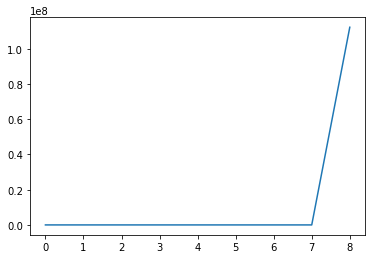

In [177]:
plt.plot(ak)

In [178]:
ak

array([ 1.00000000e+00, -1.85844585e-06,  5.17382189e+00,  1.49840516e-01,
        2.77471331e-02,  6.30550993e-04,  6.30257797e-02, -3.92345671e-01,
        1.12281238e+08])

In [180]:
mod.px_given_k_ * ak

ValueError: operands could not be broadcast together with shapes (9,8) (9,) 